In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
#50000 images , width = 32 , height = 32 , color channel = 3

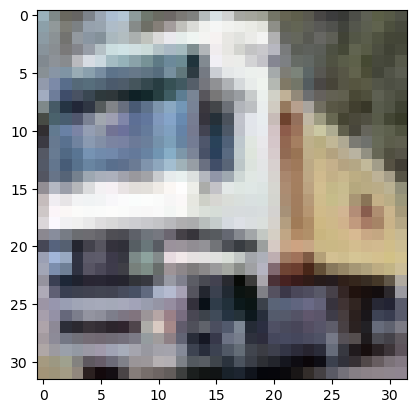

In [71]:
plt.imshow(x_train[1])

### Pre-processing

In [8]:
x_train.max()

255

In [9]:
def preprocess(a):
    a = a/a.max()
    return a

In [10]:
x_train = preprocess(x_train)

In [11]:
x_test = preprocess(x_test)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

### Model creation

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.callbacks import  EarlyStopping

In [94]:
model = Sequential()

In [95]:
model.add(Conv2D(filters=32 , kernel_size=(4,4) , input_shape = (32,32,3) , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32 , kernel_size=(4,4) , input_shape = (32,32,3) , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [96]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,138 (938.04 KB)

 Trainable params: 240,138 (938.04 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [98]:
early = EarlyStopping(monitor='val_loss', patience=2)

In [99]:
model.fit(x_train,y_cat_train , epochs=15 ,validation_data=(x_test,y_cat_test), callbacks=[early])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3588 - loss: 1.7393 - val_accuracy: 0.5394 - val_loss: 1.2619
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5741 - loss: 1.1921 - val_accuracy: 0.6106 - val_loss: 1.1077
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6395 - loss: 1.0272 - val_accuracy: 0.6265 - val_loss: 1.0745
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6795 - loss: 0.9148 - val_accuracy: 0.6500 - val_loss: 0.9988
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7157 - loss: 0.8113 - val_accuracy: 0.6683 - val_loss: 0.9620
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7423 - loss: 0.7294 - val_accuracy: 0.6673 - val_loss: 0.9763
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7716 - loss: 0.6508 - val_accuracy: 0.6813 - val_loss: 0.9663


### Model Evaluation

In [100]:
metrics = pd.DataFrame(model.history.history)

In [101]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.44886,1.517428,0.5394,1.261896
1,0.58698,1.161186,0.6106,1.107660
2,0.64304,1.014909,0.6265,1.074481
3,0.68220,0.905670,0.6500,0.998817
4,0.71568,0.815718,0.6683,0.962016
5,0.73742,0.743345,0.6673,0.976296
6,0.76674,0.667890,0.6813,0.966285


<Axes: >

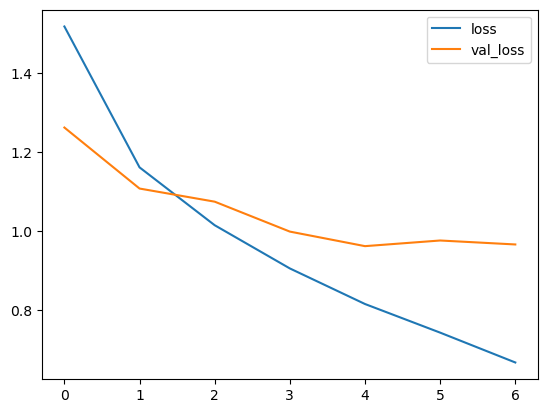

In [102]:
metrics[['loss','val_loss']].plot()

<Axes: >

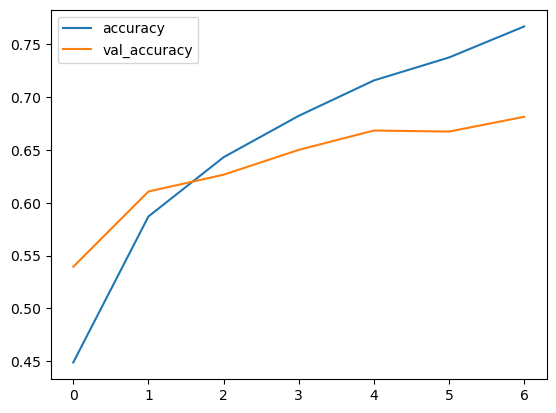

In [103]:
metrics[['accuracy','val_accuracy']].plot()

In [104]:
train_preds = np.argmax(model.predict(x_train),axis=-1)
test_preds = np.argmax(model.predict(x_test),axis=-1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [105]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [106]:
print('Train Accuracy :: ',accuracy_score(train_preds , y_train))
print('Test Accuracy :: ',accuracy_score(test_preds , y_test))

Train Accuracy ::  0.80946
Test Accuracy ::  0.6813


In [107]:
print(classification_report(test_preds , y_test))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1043
           1       0.76      0.83      0.79       920
           2       0.55      0.59      0.57       928
           3       0.56      0.47      0.51      1172
           4       0.62      0.65      0.63       960
           5       0.57      0.58      0.58       980
           6       0.81      0.69      0.74      1166
           7       0.71      0.76      0.73       934
           8       0.75      0.80      0.78       938
           9       0.74      0.77      0.76       959

    accuracy                           0.68     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [108]:
import seaborn as sns

<Axes: >

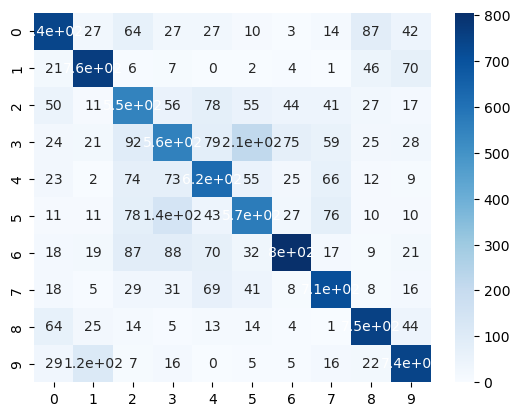

In [109]:
sns.heatmap(data = confusion_matrix(test_preds , y_test),annot=True ,cmap='Blues' )

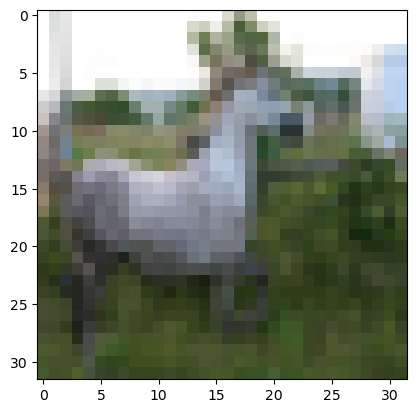

In [110]:
plt.imshow(x_test[69])

In [111]:
np.argmax(model.predict(x_test[69].reshape(1,32,32,3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


7